In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import ReceptiveField
import pickle
import numpy as np
import  modin.pandas as pd
import os
from tqdm import tqdm
from NRC import NRC,recordModule
from matplotlib.pyplot import MultipleLocator
from matplotlib.gridspec import GridSpec
from utils import returnSpec
from distributed import Client
client = Client()

In [39]:
plt.rcParams['font.size'] = '7'
plt.rcParams['svg.fonttype'] = 'none'

cm = 1/2.54
# 每次调用font dict
fontdict = dict(fontsize=5, family='Arial')

# Train size

In [29]:
scores = []
add = '../results/sweep'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:

    subFolder = add+os.sep+sub+os.sep+'trainsize.csv'
    if os.path.exists(subFolder):
        f = pd.read_csv(subFolder)
        scores.append(f)

scores = pd.concat(scores,ignore_index=True).drop_duplicates()
scores.head()

,Unnamed: 0,accuracy,winLEN,ITR,method,cv,seed,subject,trainsize
0,0,0.875,0.2,352.944718,random,0,0,yangyuxing,2
1,1,0.900,0.2,370.662195,random,0,1,yangyuxing,2
2,2,0.925,0.2,389.246690,random,0,2,yangyuxing,2
3,3,0.875,0.2,352.944718,random,0,3,yangyuxing,2
4,4,0.825,0.2,319.540018,random,0,4,yangyuxing,2


In [30]:
aveScore = scores.groupby(['seed','subject','winLEN','trainsize'],as_index=False).mean()
aveScore = aveScore.sort_values(by='score',ascending=False)
aveScore.head()

,seed,subject,winLEN,trainsize,Unnamed: 0,accuracy,ITR,cv
0,0,chenyuzhen,0.2,2,2500.0,0.691667,240.435311,2.5
26670,333,miaoyining,0.3,4,15333.0,0.970833,374.982410,2.5
26663,333,huangzixun,0.3,5,21333.0,0.970833,374.982410,2.5
26664,333,miaoyining,0.2,2,2833.0,0.775000,289.733969,2.5
26665,333,miaoyining,0.2,3,8833.0,0.829167,324.055866,2.5


<AxesSubplot:xlabel='trainsize', ylabel='ITR'>

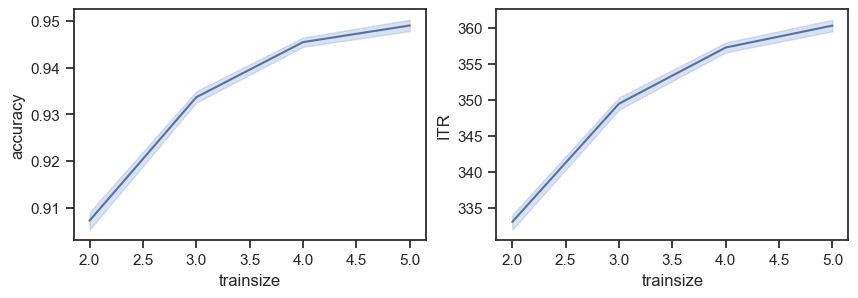

In [31]:
sns.set_theme(style='ticks')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
sns.lineplot(data=aveScore[aveScore.winLEN==0.3], x='trainsize', y='accuracy', ax=ax1, legend=False)
sns.lineplot(data=aveScore[aveScore.winLEN==0.3], x='trainsize', y='ITR', ax=ax2, legend=False)

# Visual Latency

In [2]:
latency = []
add = '../results/sweep'
subs = os.listdir(add)
for sub in subs:

    subFolder = add+os.sep+sub+os.sep+'latency.csv'
    if os.path.exists(subFolder):
        f = pd.read_csv(subFolder)
        latency.append(f)

latency = pd.concat(latency,ignore_index=True).drop_duplicates()
latency.head()

,Unnamed: 0,accuracy,winLEN,ITR,method,cv,latency,seed,subject
0,0,0.775,0.3,252.263982,random,0,0.0,0,yangyuxing
1,1,0.825,0.3,279.597515,random,0,0.0,1,yangyuxing
2,2,0.800,0.3,265.718967,random,0,0.0,2,yangyuxing
3,3,0.800,0.3,265.718967,random,0,0.0,3,yangyuxing
4,4,0.825,0.3,279.597515,random,0,0.0,4,yangyuxing


## Step response

In [3]:
evoked = []
add = '../results/sweep'
subs = os.listdir(add)

sub = 'group'
subFolder = add+os.sep+sub+os.sep+'EEG.csv'
if os.path.exists(subFolder):
    f = pd.read_csv(subFolder)
    evoked.append(f)

evoked = pd.concat(evoked,ignore_index=True).drop_duplicates()
evoked = evoked.groupby(['time'],as_index=False).mean()
evoked.head()

,time,Unnamed: 0,channel,EEG,condition
0,0.000,19875.0,0.0,-0.029797,80.5
1,0.004,19876.0,0.0,-0.108508,80.5
2,0.008,19877.0,0.0,-0.186729,80.5
3,0.012,19878.0,0.0,-0.255452,80.5
4,0.016,19879.0,0.0,-0.305907,80.5


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/shinanlin/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/z8/m0rtcw1d0g37chf76qrvr9pw0000gn/T/ipykernel_94598/3865462785.py", line 40, in <module>
    f.savefig('../images/latency.svgz',dpi=400,format='svgz')
  File "/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/figure.py", line 2311, in savefig
  File "/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 2210, in print_figure
    finally:
  File "/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/_api/deprecation.py", line 410, in wrapper
    return func(*inner_args, **inner_kwargs)
  File "/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_svg.py", line 1407, in print_svgz
    return self.print_svg(gzipwriter, **kwargs)
  File "/Users/shinanlin/opt/

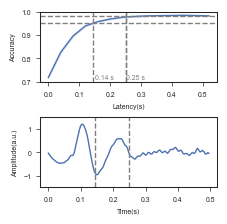

In [43]:

sns.set_theme(style='ticks')
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.8*cm, 5.8*cm))


for ax in f.axes:
    ax.tick_params(labelsize=5,width=0.5)
    ax.tick_params(labelsize=5,width=0.5,length=3,which='major')
    plt.setp(ax.spines.values(), linewidth=0.75)



plt.subplots_adjust(hspace=0.5,)

acc = sns.lineplot(data=latency,x='latency',y='accuracy',ax=ax1,linewidth=1)
pattern = sns.lineplot(data=evoked[evoked.time<0.5], x='time', y='EEG', ax=ax2,linewidth=1)

pattern.axvline(x=0.145, linestyle='dashed', color='gray',linewidth=1)
acc.axvline(x=0.145, linestyle='dashed', color='gray', linewidth=1)
ax1.set_ylim(0.7,1)
ax2.set_ylim(-1.5,1.5)

ax1.set_ylabel('Accuracy',fontdict=fontdict)
ax2.set_ylabel('Amplitude(a.u.)',fontdict=fontdict)
ax1.set_xlabel('Latency(s)',fontdict=fontdict)
ax2.set_xlabel('Time(s)',fontdict=fontdict)


ax1.text(x=0.15,y=0.71,s='0.14 s',color='gray',fontdict=fontdict)
ax1.text(x=0.25, y=0.71, s='0.25 s', color='gray', fontdict=fontdict)


pattern.axvline(x=0.25, linestyle='dashed', color='gray',linewidth=1)

acc.axvline(x=0.25, linestyle='dashed', color='gray',linewidth=1)
acc.axhline(y=0.95, linestyle='dashed', color='gray',linewidth=1)

acc.axvline(x=0.25, linestyle='dashed', color='gray',linewidth=1)
acc.axhline(y=0.98, linestyle='dashed', color='gray', linewidth=1)

f.savefig('../images/latency.svg',dpi=400,format='svg')